# Análise exploratória dos dados - Atividade 05

## Carregando as Bibliotecas

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Carregando a base de dados

In [2]:
collums_names = ['age','workclass','fnlwgt','education','education_num',
                 'marital_status','occupation','relationship','race',
                 'sex','capital_gain','capital_loss','hours_per_week',
                 'native_country','income']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', names=collums_names)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Descrição dos dados

In [3]:
df.shape

(32561, 15)

- A base tem 32561 instâncias, 15 colunas, sendo 14 atributos e 1 rótulo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- A base não tem nenhum valor nulo

In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Algumas estatísticas descritivas das variáveis quantitativas da base (contagem, média, desvio padrão, mínimo, 25% percentil, 50% percentil, 75% percentil,e máximo)  

### Variáveis e seus tipos: 

'age' é a idade, tipo: Quantitativa Contínua

'workclass': classe de trabalho, tipo: Qualitativa Nominal

'fnlwgt': espécie de peso dado durante o censo, tipo: Quantitativa Contínua 

'education': grau de escolaridade, tipo: Qualitativa Ordinal

'education_num': grau de escolaridade em números, tipo: Quantitativa Discreta

'marital_status': status matrimonial, tipo: Qualitativa Nominal

'occupation': trabalho, tipo: Qualitativa Nominal

'relationship': relacionamento atual, tipo: Qualitativa Nominal

'race': etnia, tipo: Qualitativa Nominal

'sex': sexo, tipo: Qualitativa Nominal

'capital_gain': lucros, tipo: Quantitativa Contínua

'capital_loss': despesas/perdas, tipo: Quantitativa Contínua

'hours_per_week': horas de trabalho por semana, tipo: Quantitativa Contínua

'native_country': nacionalidade, tipo: Qualitativa Nominal

'income': renda <=50K ou >50K, tipo: Qualitativa Nominal

## Perguntas de partida e hipóteses

Podemos obter várias informações com os dados, por exemplo: analisar como estão distruídos as instâncias nos grupos >50K e <=50K, identificando algumas caracteristicas dos grupos

- Quantos dados tem cada grupo? 
- A escolaridade do grupo >50K é maior que o <=50K? 
- Como estão distruídas as idades nos grupos >50K e <=50K? 
- A idade do grupo >50K é maior que o <=50k? 
- Qual a ocupação que mais tem instânicas no grupo de >50K?
- Qual a diferença de horas trabalhadas por semana entre os grupos >50K e <=50K? 
- As variáveis quantitativas são correlacionadas?

## Insights

### Quantos dados tem cada grupo?

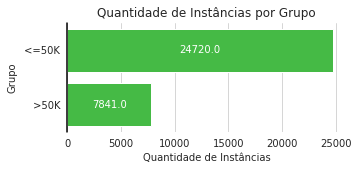

In [6]:
sns.set_style("whitegrid")

plt.figure(figsize=(5, 2))

income_count = df['income'].value_counts(ascending=False)

ax = sns.barplot(x = income_count, y = income_count.index, color='limegreen')

ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)

plt.xlabel('Quantidade de Instâncias')
plt.ylabel('Grupo')
plt.title('Quantidade de Instâncias por Grupo')

ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

- Podemos perceber que os dados estão desbalanceados em relação aos 2 grupos, com 24720 amostras <=50K e 7841 amostras >50K

### A escolaridade do grupo >50K é maior que o <=50K?

In [7]:
# para facilitar irei usar 2 bases, uma do grupo >50K e outra do <=50K
df_menor_50K = df[df['income'] == ' <=50K']
df_maior_50K = df[df['income'] == ' >50K']

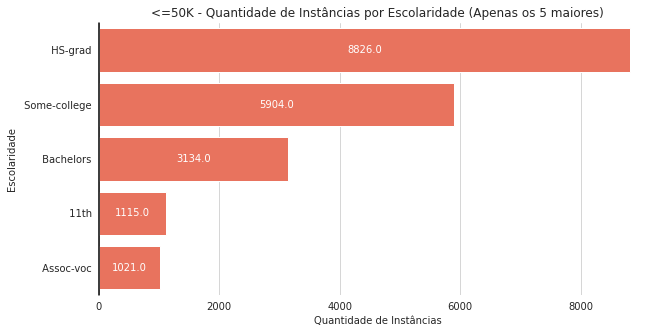

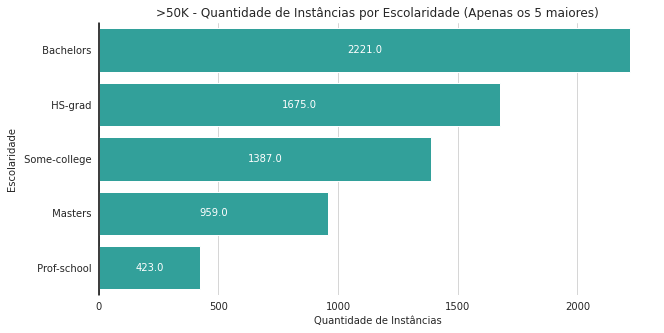

In [8]:
# <=50K
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
income_count = df_menor_50K['education'].value_counts(ascending=False)[0:5]
ax = sns.barplot(x = income_count, y = income_count.index, color='tomato')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('Quantidade de Instâncias')
plt.ylabel('Escolaridade')
plt.title('<=50K - Quantidade de Instâncias por Escolaridade (Apenas os 5 maiores)')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

#>50K
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
income_count = df_maior_50K['education'].value_counts(ascending=False)[0:5]
ax = sns.barplot(x = income_count, y = income_count.index, color='lightseagreen')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('Quantidade de Instâncias')
plt.ylabel('Escolaridade')
plt.title('>50K - Quantidade de Instâncias por Escolaridade (Apenas os 5 maiores)')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

- No grupo >50K, a maior quantidade de amostras é no Bachelors, que é o 3º colocado no grupo <=50K
- Os 3 primeiros são os mesmos nos 3 grupos, mudando só a ordem
- No 4 e 5 lugar, o grau de educação do grupo >50K é maior do que o 4 e 5 lugar do grupo <=50K

Existe uma tendência de ter uma maior escolaridade no grupo >50K, mas não é um fator determinante

### Como estão distruídas as idades nos grupos >50K e <=50K? 

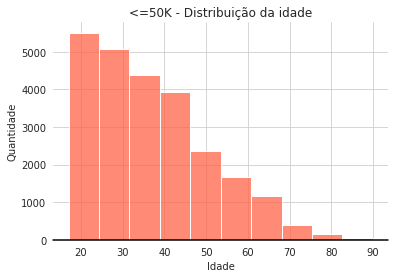

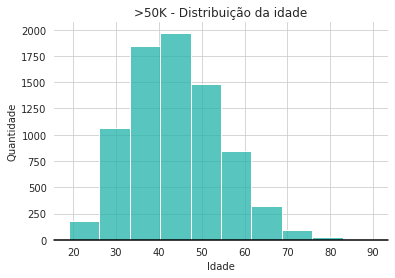

In [9]:
#<=50K
sns.set_style("whitegrid")
ax = sns.histplot(data=df_menor_50K, x='age', bins=10, color = 'tomato')
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.title('<=50K - Distribuição da idade')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

#>50K
sns.set_style("whitegrid")
ax = sns.histplot(data=df_maior_50K, x='age', bins=10, color = 'lightseagreen')
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.title('>50K - Distribuição da idade')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

- As amostras do grupo <=50K a maioria estão em torno dos 20 anos
- As amostras do grupo >50K a maioria estão em torno dos 40 anos

### A idade do grupo >50K é maior que o <=50k? 

In [10]:
print(np.mean(df_menor_50K['age']))
print(np.median(df_menor_50K['age']))

36.78373786407767
34.0


In [11]:
print(np.mean(df_maior_50K['age']))
print(np.median(df_maior_50K['age']))

44.24984058155847
44.0


- A média e a mediana dos dados são maiores para as instâncias do grupo >50K

### Qual a ocupação que mais tem instânicas no grupo de >50K?

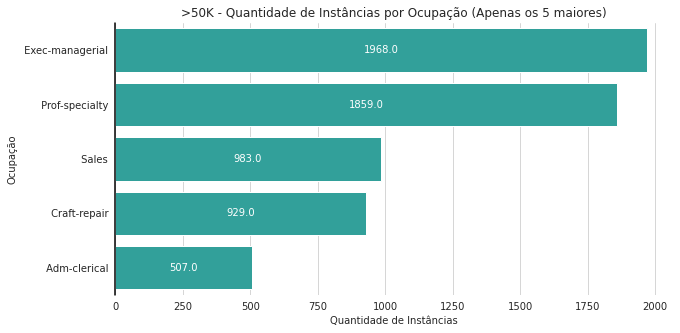

In [12]:
#>50K
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
income_count = df_maior_50K['occupation'].value_counts(ascending=False)[0:5]
ax = sns.barplot(x = income_count, y = income_count.index, color='lightseagreen')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('Quantidade de Instâncias')
plt.ylabel('Ocupação')
plt.title('>50K - Quantidade de Instâncias por Ocupação (Apenas os 5 maiores)')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

- As ocupações com mais amostras no grupo >50K são Exec-managerial e Prof-specialty

### Qual a diferença de horas trabalhadas por semana entre os grupos >50K e <=50K? 

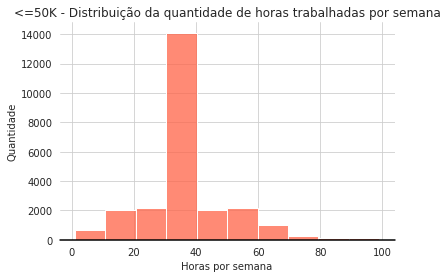

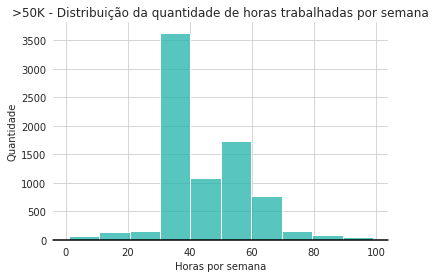

In [13]:
#<=50K
sns.set_style("whitegrid")
ax = sns.histplot(data=df_menor_50K, x='hours_per_week', bins=10, color = 'tomato')
plt.ylabel('Quantidade')
plt.xlabel('Horas por semana')
plt.title('<=50K - Distribuição da quantidade de horas trabalhadas por semana')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

#>50K
sns.set_style("whitegrid")
ax = sns.histplot(data=df_maior_50K, x='hours_per_week', bins=10, color = 'lightseagreen')
plt.ylabel('Quantidade')
plt.xlabel('Horas por semana')
plt.title('>50K - Distribuição da quantidade de horas trabalhadas por semana')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

In [14]:
print(np.mean(df_menor_50K['hours_per_week']))
print(np.median(df_menor_50K['hours_per_week']))

38.840210355987054
40.0


In [15]:
print(np.mean(df_maior_50K['hours_per_week']))
print(np.median(df_maior_50K['hours_per_week']))

45.473026399693914
40.0


- Os 2 grupos apresentam o maior pico entre 30 a 40 horas
- No grupo <=50K, a quantidade de amostras nos intervalos antes e depois do pico de 30 a 40 horas, são quase os mesmos
- No grupo >50K, os intervalos depois do pico de 30 a 40 horas são bem maiores que os anteriores ao pico
- O grupo >50K tem maior média de horas trabalhadas por semana, mas os 2 grupos tem a mesma mediana

### As variáveis quantitativas são correlacionadas?

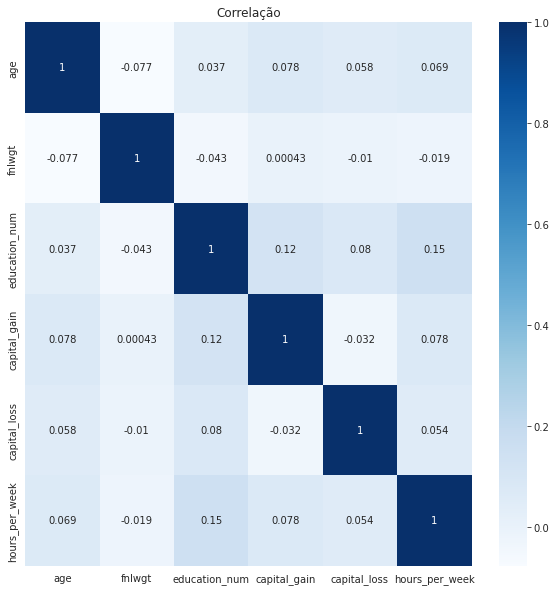

In [16]:
corr = df.corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, cmap="Blues", annot=True)
ax.set_title(f'Correlação')
plt.show();

- Há pouca correlação entre as variáveis quantitativas, indicando que uma não depende da outra